In [1]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [2]:
import os
trainFile = 'F:\\BaiduYunDownload\\金融的人工智能革命\\第4周\\作业数据\\LoanStats3a.csv'

pwd = os.getcwd()#get current work directory
print('1',pwd)
os.chdir(os.path.dirname(trainFile))#
print(os.path.dirname(trainFile))


data = pd.read_csv('LoanStats3a.csv',encoding='latin-1',skiprows = 1) #读取数据data.head() #查看表格默认前5行

1 F:\BaiduYunDownload\金融的人工智能革命\第4周\代码
F:\BaiduYunDownload\金融的人工智能革命\第4周\作业数据


In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,5000.00000,5000.00000,4975.00000,36 months,10.65%,162.87000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,2500.00000,2500.00000,2500.00000,60 months,15.27%,59.83000,C,C4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,2400.00000,2400.00000,2400.00000,36 months,15.96%,84.33000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,13.49%,339.31000,C,C1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,3000.00000,3000.00000,3000.00000,60 months,12.69%,67.79000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
5,NaN,nan,5000.00000,5000.00000,5000.00000,36 months,7.90%,156.46000,A,A4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
6,NaN,nan,7000.00000,7000.00000,7000.00000,60 months,15.96%,170.08000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
7,NaN,nan,3000.00000,3000.00000,3000.00000,36 months,18.64%,109.43000,E,E1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
8,NaN,nan,5600.00000,5600.00000,5600.00000,60 months,21.28%,152.39000,F,F2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
9,NaN,nan,5375.00000,5375.00000,5350.00000,60 months,12.69%,121.45000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [4]:
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) #查看缺失值比例
print(check_null[check_null > 0.2]) # 查看缺失比例大于20%的属性。


total_cu_tl                           1.00000
pct_tl_nvr_dlq                        1.00000
mths_since_recent_bc                  1.00000
mths_since_recent_bc_dlq              1.00000
mths_since_recent_inq                 1.00000
mths_since_recent_revol_delinq        1.00000
num_accts_ever_120_pd                 1.00000
num_actv_bc_tl                        1.00000
num_actv_rev_tl                       1.00000
num_bc_sats                           1.00000
num_bc_tl                             1.00000
num_il_tl                             1.00000
num_op_rev_tl                         1.00000
num_rev_accts                         1.00000
num_rev_tl_bal_gt_0                   1.00000
num_sats                              1.00000
num_tl_120dpd_2m                      1.00000
num_tl_30dpd                          1.00000
num_tl_90g_dpd_24m                    1.00000
mort_acc                              1.00000
mo_sin_rcnt_tl                        1.00000
mo_sin_rcnt_rev_tl_op             

In [5]:
thresh_count = len(data)*0.4 # 设定阀值
data = data.dropna(thresh=thresh_count, axis=1 )
data.shape

(42538, 54)

In [6]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

desc                         0.31254
emp_title                    0.06176
pub_rec_bankruptcies         0.03216
chargeoff_within_12_mths     0.00348
collections_12_mths_ex_med   0.00348
tax_liens                    0.00254
revol_util                   0.00219
last_pymnt_d                 0.00202
delinq_2yrs                  0.00075
earliest_cr_line             0.00075
inq_last_6mths               0.00075
open_acc                     0.00075
total_acc                    0.00075
pub_rec                      0.00075
delinq_amnt                  0.00075
acc_now_delinq               0.00075
title                        0.00035
last_credit_pull_d           0.00016
annual_inc                   0.00016
purpose                      0.00007
funded_amnt                  0.00007
funded_amnt_inv              0.00007
term                         0.00007
pymnt_plan                   0.00007
installment                  0.00007
grade                        0.00007
loan_status                  0.00007
i

In [9]:

data.to_csv('loans_2017q2_ml.csv', index = False) # 将初步预处理后的数据转化为csv

In [10]:
loans = pd.read_csv('loans_2017q2_ml.csv',encoding='gb2312')
loans.dtypes.value_counts() # 分类统计数据类型

float64    29
object     25
dtype: int64

In [11]:
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [12]:
objectColumns = loans.select_dtypes(include=["object"]).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)


desc                    13295
emp_title                2627
revol_util                 93
last_pymnt_d               86
earliest_cr_line           32
title                      15
last_credit_pull_d          7
debt_settlement_flag        3
home_ownership              3
int_rate                    3
grade                       3
sub_grade                   3
emp_length                  3
loan_status                 3
verification_status         3
issue_d                     3
purpose                     3
zip_code                    3
addr_state                  3
term                        3
dtype: int64

In [13]:
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')



In [14]:
loans.int_rate.head(10)


0   10.65000
1   15.27000
2   15.96000
3   13.49000
4   12.69000
5    7.90000
6   15.96000
7   18.64000
8   21.28000
9   12.69000
Name: int_rate, dtype: float64

In [15]:
objectColumns = loans.select_dtypes(include=["object"]).columns  # 对objectColumns重新赋值

In [16]:
print(objectColumns)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'debt_settlement_flag'],
      dtype='object')


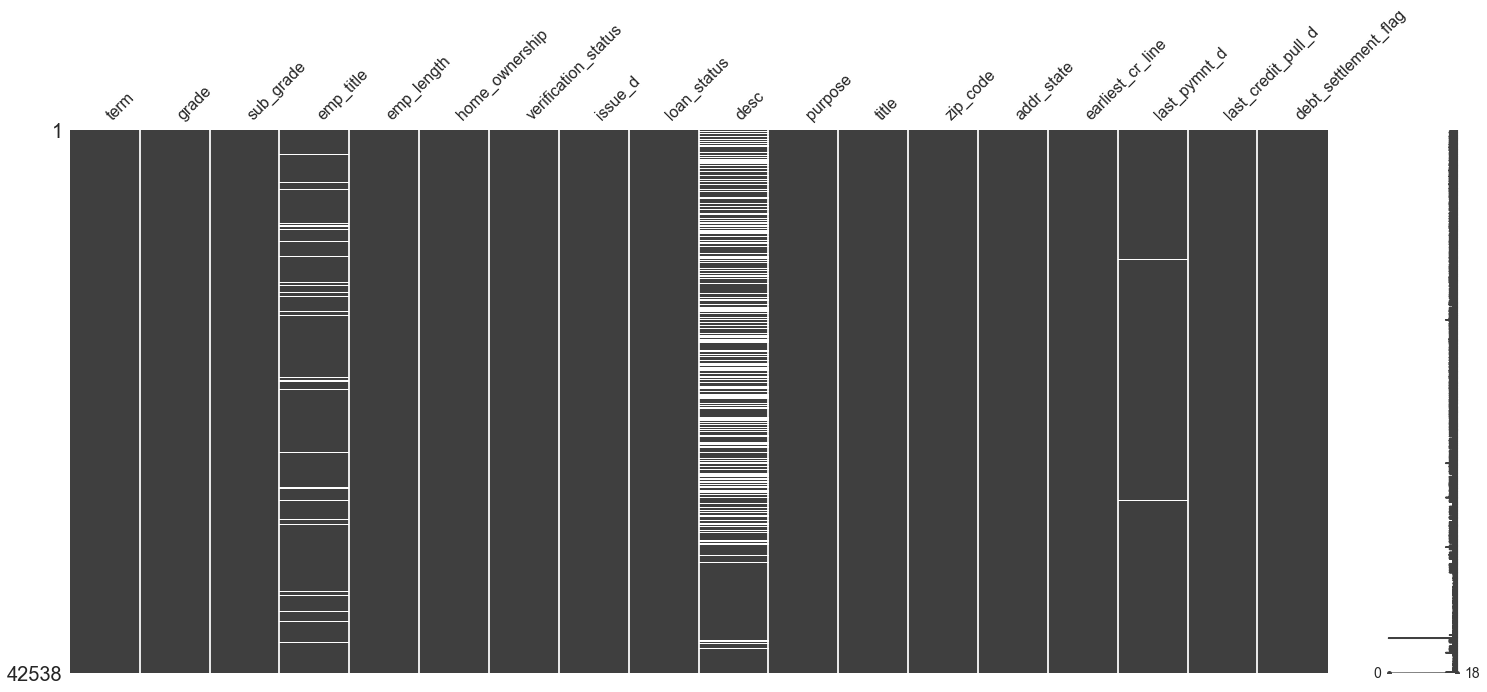

In [17]:
msno.matrix(loans[objectColumns]) #缺失值可视化

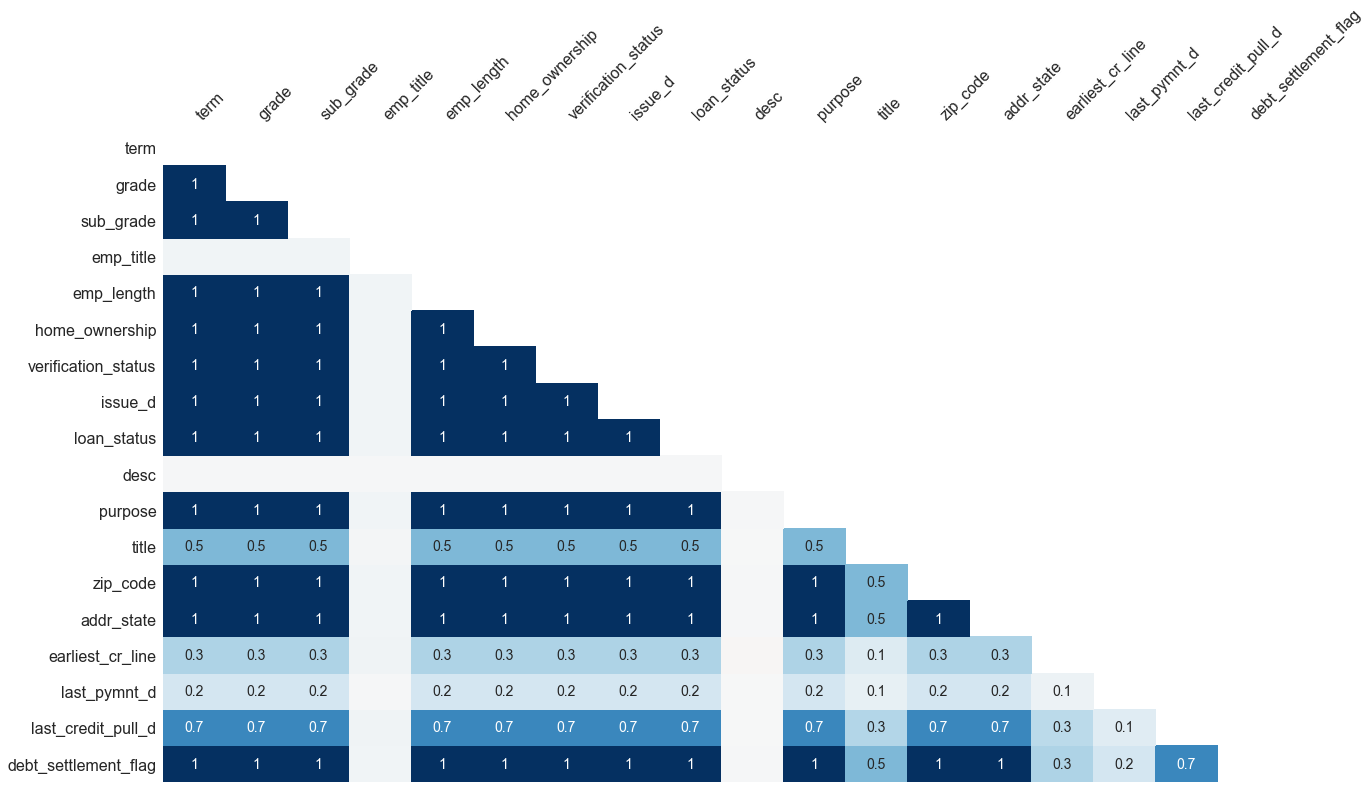

In [18]:
msno.heatmap(loans[objectColumns]) #查看缺失值之间的相关性

In [19]:
objectColumns = loans.select_dtypes(include=["object"]).columns # 筛选数据类型为object的数据
loans[objectColumns] = loans[objectColumns].fillna("Unknown") #以分类“Unknown”填充缺失值


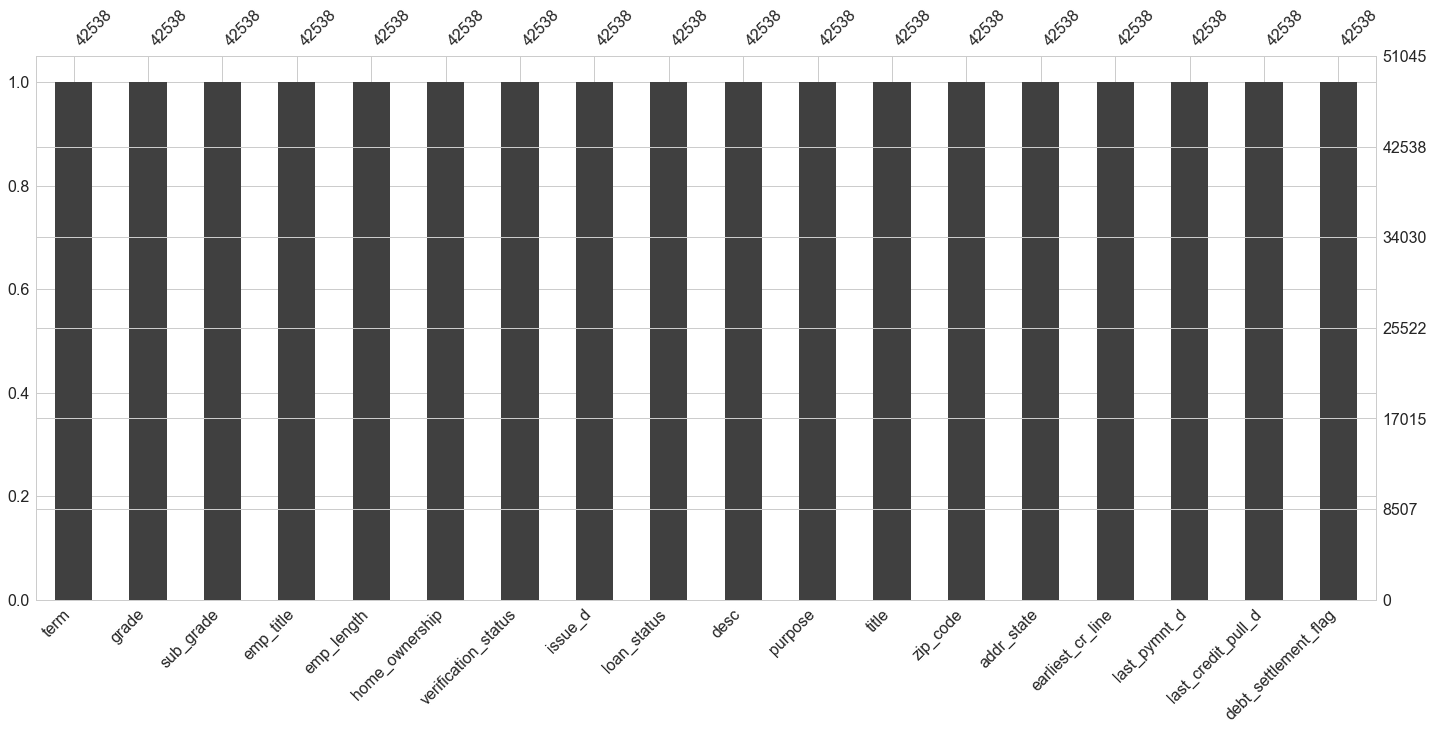

In [20]:
msno.bar(loans[objectColumns]) #可视化

In [21]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies       1368
tax_liens                   108
revol_util                   93
acc_now_delinq               32
open_acc                     32
delinq_2yrs                  32
total_acc                    32
delinq_amnt                  32
inq_last_6mths               32
pub_rec                      32
annual_inc                    7
funded_amnt                   3
funded_amnt_inv               3
int_rate                      3
installment                   3
dti                           3
revol_bal                     3
last_pymnt_amnt               3
total_pymnt                   3
total_pymnt_inv               3
total_rec_prncp               3
total_rec_int                 3
total_rec_late_fee            3
recoveries                    3
collection_recovery_fee       3
loan_amnt                     3
dtype: int64

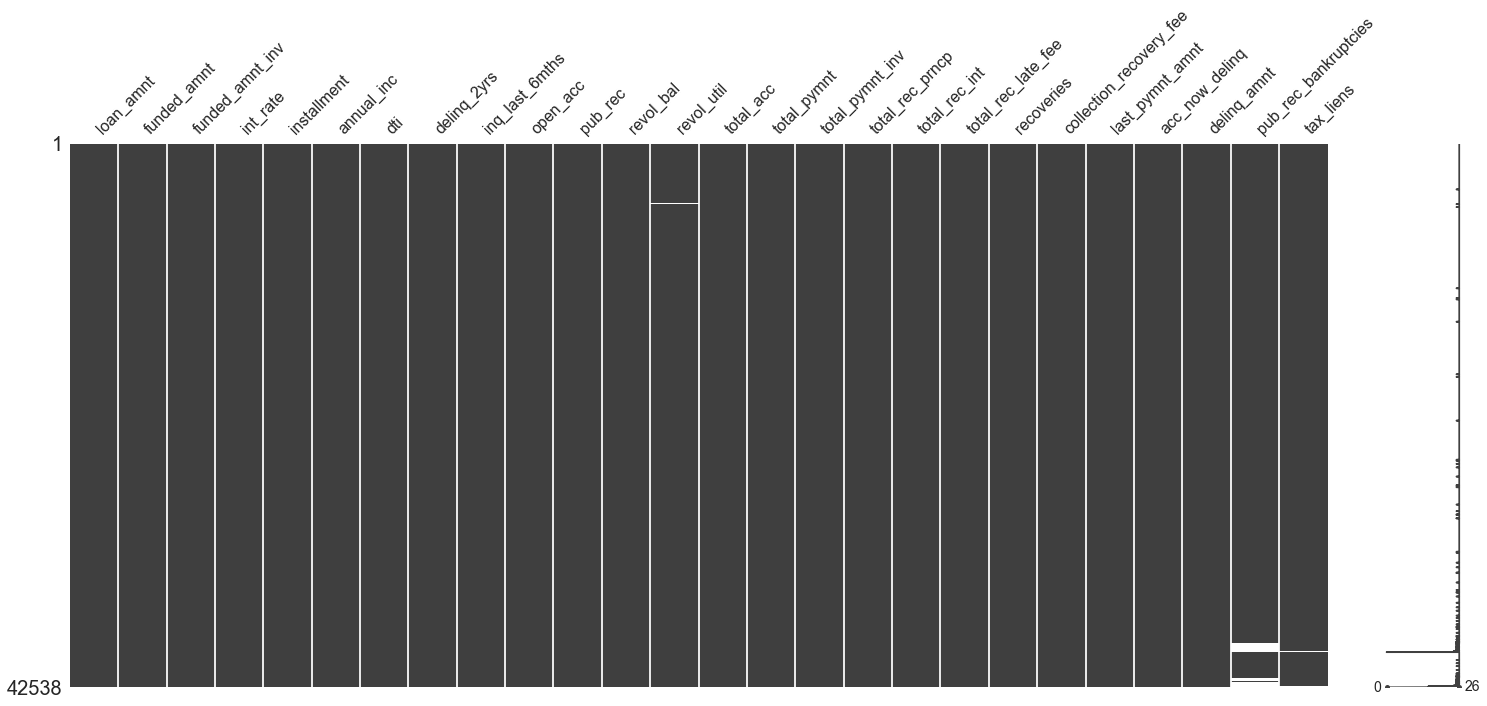

In [22]:
numColumns = loans.select_dtypes(include=[np.number]).columns
msno.matrix(loans[numColumns])


In [23]:
pd.set_option('display.max_columns', len(loans.columns))
loans[numColumns]



,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.00000,5000.00000,4975.00000,10.65000,162.87000,24000.00000,27.65000,0.00000,1.00000,3.00000,0.00000,13648.00000,83.70000,9.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,171.62000,0.00000,0.00000,0.00000,0.00000
1,2500.00000,2500.00000,2500.00000,15.27000,59.83000,30000.00000,1.00000,0.00000,5.00000,3.00000,0.00000,1687.00000,9.40000,4.00000,1014.53000,1014.53000,456.46000,435.17000,0.00000,122.90000,1.11000,119.66000,0.00000,0.00000,0.00000,0.00000
2,2400.00000,2400.00000,2400.00000,15.96000,84.33000,12252.00000,8.72000,0.00000,2.00000,2.00000,0.00000,2956.00000,98.50000,10.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,649.91000,0.00000,0.00000,0.00000,0.00000
3,10000.00000,10000.00000,10000.00000,13.49000,339.31000,49200.00000,20.00000,0.00000,1.00000,10.00000,0.00000,5598.00000,21.00000,37.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,0.00000,0.00000,357.48000,0.00000,0.00000,0.00000,0.00000
4,3000.00000,3000.00000,3000.00000,12.69000,67.79000,80000.00000,17.94000,0.00000,0.00000,15.00000,0.00000,27783.00000,53.90000,38.00000,4066.90816,4066.91000,3000.00000,1066.91000,0.00000,0.00000,0.00000,67.30000,0.00000,0.00000,0.00000,0.00000
5,5000.00000,5000.00000,5000.00000,7.90000,156.46000,36000.00000,11.20000,0.00000,3.00000,9.00000,0.00000,7963.00000,28.30000,12.00000,5632.21000,5632.21000,5000.00000,632.21000,0.00000,0.00000,0.00000,161.03000,0.00000,0.00000,0.00000,0.00000
6,7000.00000,7000.00000,7000.00000,15.96000,170.08000,47004.00000,23.51000,0.00000,1.00000,7.00000,0.00000,17726.00000,85.60000,11.00000,10137.84001,10137.84000,7000.00000,3137.84000,0.00000,0.00000,0.00000,1313.76000,0.00000,0.00000,0.00000,0.00000
7,3000.00000,3000.00000,3000.00000,18.64000,109.43000,48000.00000,5.35000,0.00000,2.00000,4.00000,0.00000,8221.00000,87.50000,4.00000,3939.13529,3939.14000,3000.00000,939.14000,0.00000,0.00000,0.00000,111.34000,0.00000,0.00000,0.00000,0.00000
8,5600.00000,5600.00000,5600.00000,21.28000,152.39000,40000.00000,5.55000,0.00000,2.00000,11.00000,0.00000,5210.00000,32.60000,13.00000,647.50000,647.50000,162.02000,294.94000,0.00000,190.54000,2.09000,152.39000,0.00000,0.00000,0.00000,0.00000
9,5375.00000,5375.00000,5350.00000,12.69000,121.45000,15000.00000,18.08000,0.00000,0.00000,2.00000,0.00000,9279.00000,36.50000,3.00000,1484.59000,1477.70000,673.48000,533.42000,0.00000,277.69000,2.52000,121.45000,0.00000,0.00000,0.00000,0.00000


In [26]:
loans=loans.iloc[:42536,:]#删除最后两行，最后两行数据异常
loans.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
42531,3500.00000,3500.00000,225.00000,36 months,10.28000,113.39000,C,C1,Unknown,< 1 year,RENT,180000.00000,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,I am getting married on July 28 and will need ...,other,Wedding coming up,100xx,NY,10.00000,nan,Unknown,nan,nan,nan,0.00000,nan,nan,3719.43107,239.11000,3500.00000,219.43000,0.00000,0.00000,0.00000,Mar-2008,0.00000,Feb-2013,nan,nan,nan,nan,N
42532,1000.00000,1000.00000,0.00000,36 months,9.64000,32.11000,B,B4,Halping hands company inc.,< 1 year,RENT,12000.00000,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,I would like to buy some new furniture in my a...,other,delight,021xx,MA,10.00000,nan,Unknown,nan,nan,nan,0.00000,nan,nan,1155.60090,0.00000,1000.00000,155.60000,0.00000,0.00000,0.00000,Jun-2010,32.41000,Sep-2014,nan,nan,nan,nan,N
42533,2525.00000,2525.00000,225.00000,36 months,9.33000,80.69000,B,B3,Unknown,< 1 year,RENT,110000.00000,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,"I need to pay $2,100 for fixing my Volvo :) A...",other,Car repair bill,100xx,NY,10.00000,nan,Unknown,nan,nan,nan,0.00000,nan,nan,2904.49883,258.82000,2525.00000,379.50000,0.00000,0.00000,0.00000,Jun-2010,82.03000,May-2007,nan,nan,nan,nan,N
42534,6500.00000,6500.00000,0.00000,36 months,8.38000,204.84000,A,A5,Unknown,< 1 year,NONE,nan,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,"Hi, I'm buying a used car. Anybody on faceb...",other,Buying a car,100xx,NY,4.00000,nan,Unknown,nan,nan,nan,0.00000,nan,nan,7373.90496,0.00000,6500.00000,873.90000,0.00000,0.00000,0.00000,Jun-2010,205.32000,Aug-2007,nan,nan,nan,nan,N
42535,5000.00000,5000.00000,0.00000,36 months,7.75000,156.11000,A,A3,Homemaker,10+ years,MORTGAGE,70000.00000,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,I need to make several improvements around the...,other,Aroundthehouse,068xx,CT,8.81000,nan,Unknown,nan,nan,nan,0.00000,nan,nan,5619.76209,0.00000,5000.00000,619.76000,0.00000,0.00000,0.00000,Jun-2010,156.39000,Feb-2015,nan,nan,nan,nan,N


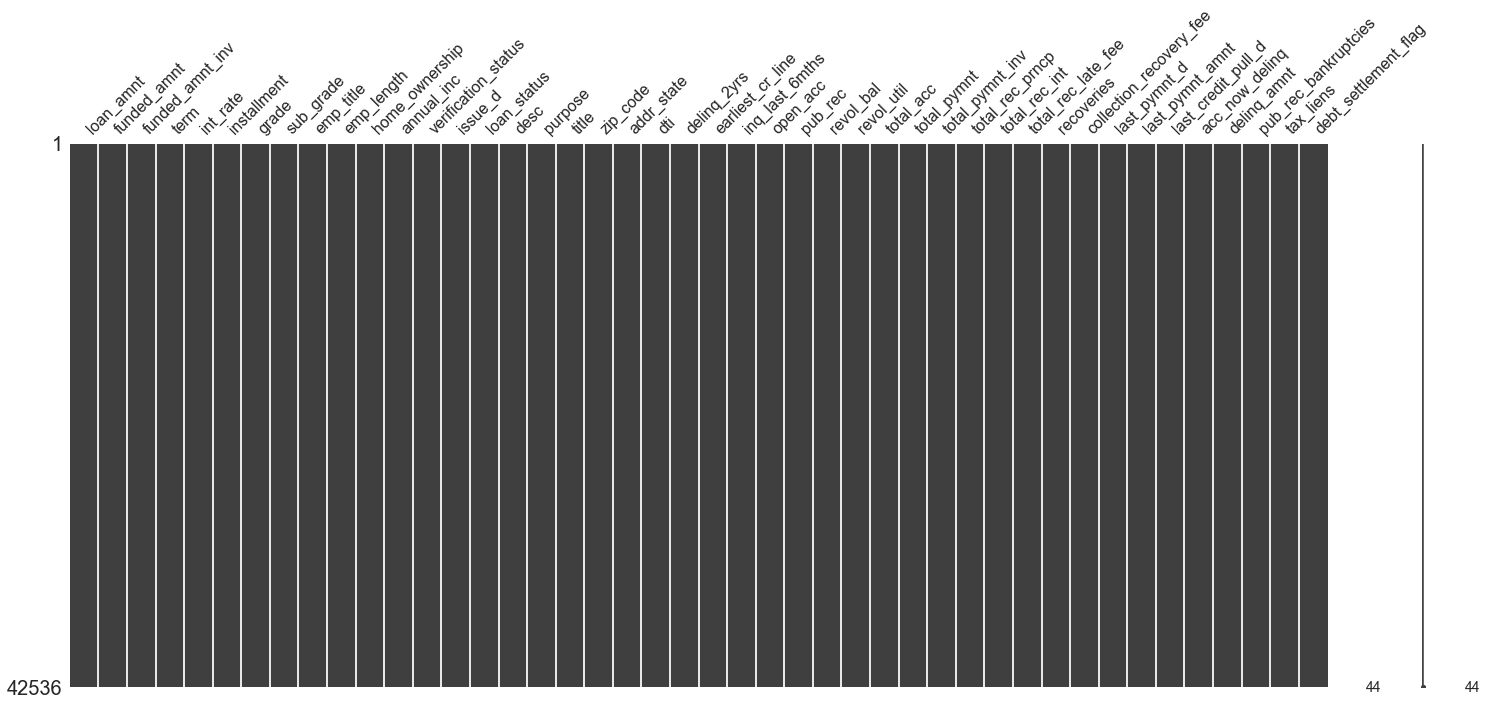

In [27]:
#插入缺失值
from sklearn.preprocessing import Imputer 
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 针对axis=0 列来处理
imr = imr.fit(loans[numColumns])
loans[numColumns] = imr.transform(loans[numColumns])
msno.matrix(loans)

In [28]:
#数据过滤--对于同一份数据基于不同的数据挖掘目的，很多时候不需要把所有数据进行训练。冗余特征重复了包含在一个或多个其他属性中的许多或所有信息。
#例如，zip_code对于我们借款人的偿债能力并没有任何意义。grade和sub_grade是重复的属性信息。下一步，我们对数据进行过滤。

objectColumns = loans.select_dtypes(include=["object"]).columns
var = loans[objectColumns].columns
for v in var:
    print('\nFrequency count for variable {0}'.format(v))
    print(loans[v].value_counts())
loans[objectColumns].shape



Frequency count for variable term
 36 months    31534
 60 months    11001
Unknown           1
Name: term, dtype: int64

Frequency count for variable grade
B          12389
A          10183
C           8740
D           6016
E           3394
F           1301
G            512
Unknown        1
Name: grade, dtype: int64

Frequency count for variable sub_grade
B3         2997
A4         2905
B5         2807
A5         2793
B4         2590
C1         2264
C2         2157
B2         2113
B1         1882
A3         1823
C3         1658
A2         1520
D2         1485
C4         1370
D3         1322
C5         1291
A1         1142
D4         1140
D1         1053
D5         1016
E1          884
E2          791
E3          668
E4          552
E5          499
F1          392
F2          308
F3          236
F4          211
F5          154
G1          141
G2          107
G4           99
G5           86
G3           79
Unknown       1
Name: sub_grade, dtype: int64

Frequency count for variable emp_ti

(42536, 18)

In [31]:
drop_list = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
             'title','issue_d','last_pymnt_d','last_pymnt_amnt',
             'last_credit_pull_d','collection_recovery_fee', 'earliest_cr_line']
loans.drop(drop_list, axis=1,inplace=True)
loans

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.00000,5000.00000,4975.00000,36 months,10.65000,162.87000,B,10+ years,RENT,24000.00000,Verified,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,27.65000,0.00000,1.00000,3.00000,0.00000,13648.00000,83.70000,9.00000,5863.15519,5833.84000,5000.00000,863.16000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
1,2500.00000,2500.00000,2500.00000,60 months,15.27000,59.83000,C,< 1 year,RENT,30000.00000,Source Verified,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,1.00000,0.00000,5.00000,3.00000,0.00000,1687.00000,9.40000,4.00000,1014.53000,1014.53000,456.46000,435.17000,0.00000,122.90000,0.00000,0.00000,0.00000,0.00000,N
2,2400.00000,2400.00000,2400.00000,36 months,15.96000,84.33000,C,10+ years,RENT,12252.00000,Not Verified,Fully Paid,Unknown,small_business,8.72000,0.00000,2.00000,2.00000,0.00000,2956.00000,98.50000,10.00000,3005.66684,3005.67000,2400.00000,605.67000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
3,10000.00000,10000.00000,10000.00000,36 months,13.49000,339.31000,C,10+ years,RENT,49200.00000,Source Verified,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,20.00000,0.00000,1.00000,10.00000,0.00000,5598.00000,21.00000,37.00000,12231.89000,12231.89000,10000.00000,2214.92000,16.97000,0.00000,0.00000,0.00000,0.00000,0.00000,N
4,3000.00000,3000.00000,3000.00000,60 months,12.69000,67.79000,B,1 year,RENT,80000.00000,Source Verified,Fully Paid,Borrower added on 12/21/11 > I plan on combi...,other,17.94000,0.00000,0.00000,15.00000,0.00000,27783.00000,53.90000,38.00000,4066.90816,4066.91000,3000.00000,1066.91000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
5,5000.00000,5000.00000,5000.00000,36 months,7.90000,156.46000,A,3 years,RENT,36000.00000,Source Verified,Fully Paid,Unknown,wedding,11.20000,0.00000,3.00000,9.00000,0.00000,7963.00000,28.30000,12.00000,5632.21000,5632.21000,5000.00000,632.21000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
6,7000.00000,7000.00000,7000.00000,60 months,15.96000,170.08000,C,8 years,RENT,47004.00000,Not Verified,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,23.51000,0.00000,1.00000,7.00000,0.00000,17726.00000,85.60000,11.00000,10137.84001,10137.84000,7000.00000,3137.84000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
7,3000.00000,3000.00000,3000.00000,36 months,18.64000,109.43000,E,9 years,RENT,48000.00000,Source Verified,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,5.35000,0.00000,2.00000,4.00000,0.00000,8221.00000,87.50000,4.00000,3939.13529,3939.14000,3000.00000,939.14000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,N
8,5600.00000,5600.00000,5600.00000,60 months,21.28000,152.39000,F,4 years,OWN,40000.00000,Source Verified,Charged Off,Borrower added on 12/21/11 > I own a small h...,small_business,5.55000,0.00000,2.00000,11.00000,0.00000,5210.00000,32.60000,13.00000,647.50000,647.50000,162.02000,294.94000,0.00000,190.54000,0.00000,0.00000,0.00000,0.00000,N
9,5375.00000,5375.00000,5350.00000,60 months,12.69000,121.45000,B,< 1 year,RENT,15000.00000,Verified,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,18.08000,0.00000,0.00000,2.00000,0.00000,9279.00000,36.50000,3.00000,1484.59000,1477.70000,673.48000,533.42000,0.00000,277.69000,0.00000,0.00000,0.00000,0.00000,N


In [33]:
loans.select_dtypes(include = ['object']).shape


(42536, 9)

###特征工程###
###特征工程是机器学习中最重要的步骤。实际工作中，特征工程是个反复迭代的过程，大部分时间也是在分析业务、分析case，不断地找特征。更好的特征意味着只需要用简单的模型，更好的特征也意味着能够获得更好的依据去预测结果。2014年天池比赛，第一名团队的模型并不复杂，但他们特征更贴近业务，对业务场景理解比较好，出来的结果比淘宝负责做推荐的准确率提升16%。
本次项目特征工程主要分4大部分：1、特征衍生 2、特征抽象 3、特征缩放 4、特征选择
1 特征衍生
特征衍生是指利用现有的特征进行某种组合生成新的特征。在风险控制方面，传统银行获得企业的基本财务报表（资产负债表、利润表以及现金流量表），
借助于现代成熟的财务管理体系，在不同业务场景的需求下，利用企业财务报表各种项目之间的组合，就可以衍生不同新特征反映企业不同的财务状况，
例如资产与负债项目组合能够生成反映企业债务情况的特征，收入与应收账款组合能生成反映应收账款周转率（资金效率）特征等，
同时还能利用企业财务报表之间的勾稽关系生成新特征来作证企业报表的质量。在金融风险控制中，要做好以上工作的前提是，
你必须熟悉各种业务场景同时精通财务知识。
而Lending Club平台中，"installment"代表贷款每月分期的金额，我们将'annual_inc'除以12个月获得贷款申请人的月收入金额，
然后再把"installment"（月负债）与（'annual_inc'/12）（月收入）相除生成新的特征'installment_feat'，
新特征'installment_feat'代表客户每月还款支出占月收入的比，'installment_feat'的值越大，意味着贷款人的偿债压力越大，违约的可能性越大。

In [34]:

loans['installment_feat'] = loans['installment'] / (loans['annual_inc'] / 12)

In [ ]:
#使用Pandas replace函数定义新函数：

def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

#把贷款状态LoanStatus编码为违约=1, 正常=0:

pd.value_counts(loans["loan_status"])

loans["loan_status"] = coding(loans["loan_status"], {'Current':0,'Fully Paid':0,'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1})

print( '\nAfter Coding:')

pd.value_counts(loans["loan_status"])


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()


In [ ]:
object_columns_df =loans.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df.iloc[0])

In [ ]:
loans['delinq_2yrs'] = loans['delinq_2yrs'].apply(lambda x: float(x))
loans['total_acc'] = loans['total_acc'].apply(lambda x: float(x))
loans['revol_bal'] = loans ['revol_bal'].apply(lambda x: float(x))
loans.select_dtypes(include=["object"]).describe().T # 再次检查数据


In [ ]:
# 构建mapping，对有序变量"emp_length”、“grade”进行转换
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict) #变量映射
loans[['emp_length','grade']].head() #查看效果


In [ ]:
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term"] 
dummy_df = pd.get_dummies(loans[n_columns])# 用get_dummies进行one hot编码
loans = pd.concat([loans, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并


In [ ]:
loans.loc[:,loans.columns.str.contains("home_ownership")].head() #筛选包含home_ownership的所有变量


In [ ]:
loans = loans.drop(n_columns, axis=1)  #清除原来的分类变量

In [ ]:
loans.info()

In [ ]:
col = loans.select_dtypes(include=['int64','float64']).columns
len(col) #78个特征
#col = col.drop('loan_status') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df###################################################################################
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化loans_ml_df.head() #查看经标准化后的数据

In [ ]:
loans_ml_df.head()


In [ ]:
#构建X特征变量和Y目标变量
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')
x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature) # 查看初始特征集合的数量

In [ ]:
x_val.describe().T # 初览数据

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 30) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中


In [ ]:
y_val